<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- 머신러닝 모델링을 할 때 자주 사용되는 전처리 방법을 리뷰합니다.
- 익숙하지 않은 방법은 반복 실습을 통해 익숙해져야 합니다.
- 다룰 내용
    - 라이브러리 불러오기
    - 데이터 불러오기
    - 불필요한 변수 제거
    - NaN 조치
    - 가변수화
    - 데이터 분리
    - 정규화

# 1.라이브러리, 데이터 불러오기

- 우선 사용할 라이브러와 분석 대상 데이터를 불러옵니다.

## 1.1. 라이브러리 불러오기

- 사용할 라이브러리를 불러옵니다.

In [74]:
# 라이브러리 불러오기

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as spst


%config InlineBackend.figure_format = 'retina' 



## 1.2. 데이터 읽어오기

- 분석 대상 데이터를 읽어옵니다.

In [76]:
# 데이터 읽어오기
path = "https://raw.githubusercontent.com/jangrae/csv/master/titanic_train.csv"
titanic = pd.read_csv(path)

In [81]:
# 상위 데이터 확인
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 이후에 필요할 수 있으니 데이터프레임을 복사해 둡니다.

In [78]:
# 데이터프레임 복사
titanic_bk = titanic.copy()

# 2. 열 추가와 제거

- 새로운 열을 추가하거나 불필요한 열을 제거합니다.

## 2.1 열 추가

- 새로운 열을 추가합니다.

In [84]:
# Title 열 추가  --> 정규식 사용
titanic['Title'] = titanic['Name'].str.extract('([A-Za-z]+)\.') # .  \ 앞에 ()안에 있는 [A~z]까지 가져온다 대신 
                                                                #     문자열이 2개이상인경우 +를 추가
# 확인 
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


## 2.2 불필요한 열 제거

- Cabin은 77.1%가 NaN이기에 채울 방법이 마땅치 않으니 제거합니다.
- PassengerId, Name, Ticket은 븐삭에 큰 의미가 없을 것으로 판단되니 제거합니다.
- 데이터프레임을 다룰 때 axis=0는 행, axis=1은 열을 의미함을 기억하세요.

In [85]:
# 여러 열 동시 제거
del_cols = ['Cabin', 'PassengerId', 'Name', 'Ticket']
titanic.drop(del_cols, axis = 1 , inplace =True)

In [86]:
# 확인
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


# 3.NaN 조치

- 정확한 분석과 예측을 위해 NaN 값, 측 결측치에 대한 처리가 필요합니다.

## 3.1. NaN 확인

- NaN 값이 있는지 우선 확인합니다.

In [88]:
# 변수들의 NaN 포함 상태 화인
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

## 3.2. NaN 삭제

- NaN 값이 포함된 행이나 열이 중요하지 않다면 해당 행이나 열을 제거합니다.
- NaN 값이 너무 많이 포함된 경우, 적절히 채울 수 없다면 해당 행과 열을 제거합니다.

### 3.2.1. 행 제거

- 결측치를 적절히 채울 방법이 없거나, 결측치가 전체 데이터의 극히 일부분 이라면 결측치를 제거합니다.

**1) 모든 행 제거**

In [89]:
# 연습을 위해 복사
titanic2 = titanic.copy()

# 확인
titanic2.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [90]:
# NaN이 포함된 모든 행(axis=0) 제거
titanic2.dropna(axis= 0, inplace = True )

# 확인
titanic2.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [91]:
# 데이터 크기 확인
titanic2.shape

(712, 9)

**2) 일부 행 제거**

In [92]:
# 연습을 위해 복사
titanic2 = titanic.copy()

# 확인
titanic2.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [93]:
# 데이터 크기 확인
titanic2.shape

(891, 9)

In [94]:
# Age 열에 NaN이 포함된 행 제거
titanic2.dropna(axis= 0 , subset = 'Age', inplace =True)

# 확인
titanic2.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [95]:
# 데이터 크기 확인
titanic2.shape

(714, 9)

### 3.2.2. 열 제거

- NaN 값이 포함된 열이 그리 중요하지 않거나, NaN 값이 너무 많다면 해당 열을 제거합니다.

In [96]:
# 연습을 위해 복사
titanic2 = titanic.copy()

# 확인
titanic2.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [97]:
# NaN 열이 포함된 모든 열(axis=1) 제거
titanic2.dropna(axis = 1, inplace = True)

# 확인
titanic2.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Title       0
dtype: int64

In [98]:
# 데이터 크기 확인
titanic2.shape

(891, 7)

## 3.3. NaN 채우기

- NaN 값이 포함된 행이나 열을 제거할 수 없다면 특정 값으로 채웁니다.

### 3.3.1. 앞/뒤 값으로 채우기

- 시계열 데이터인 경우 많이 사용하는 방법입니다.
- method='ffill': 바로 앞의 값으로 채우기
- method='bfill': 바로 뒤의 값으로 채우기

In [99]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/airquality.csv'
air = pd.read_csv(path)

# 확인
air.head(10)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
5,28.0,NaN,14.9,66,5,6
6,23.0,299.0,8.6,65,5,7
7,19.0,99.0,13.8,59,5,8
8,8.0,19.0,20.1,61,5,9
9,NaN,194.0,8.6,69,5,10


In [100]:
# 연습을 위해 복사
air2 = air.copy()

# NaN 확인
air2.isna().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [101]:
# Ozone 열 NaN 값을 바로 앞의 값으로 채우기

air2['Ozone'].fillna( method = 'ffill', inplace =True)
# Solar.R 열 NaN 값을 바로 뒤의 값으로 채우기
air2['Solar.R'].fillna( method = 'bfill' , inplace = True)

# 확인
air2.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

### 3.3.2. 선형 보간법으로 채우기

- interpolate 메소드에 method='linear' 옵션을 지정해 선형 보간법으로 채웁니다.

In [102]:
# 연습을 위해 복사
air2 = air.copy()

# NaN 확인
air2.isna().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [103]:
# 선형 보간법으로 채우기
air2['Ozone'].interpolate(method='linear', inplace=True)
air2['Solar.R'].interpolate(method='linear', inplace=True)

# 확인
air2.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

### 3.3.3. 특정 값으로 채우기

- 임의의 값을 지정해 NaN 값을 채웁니다.
- 평균값이나 최빈값으로 채우는 경우가 많습니다.

In [107]:
# 연습을 위해 복사
titanic2 = titanic.copy()

# 확인
titanic2.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

**1) 평균값으로 채우기**

In [108]:
# Age 평균 구하기
mean_age = titanic2['Age'].mean()

# NaN을 평균값으로 채우기
titanic2['Age'].fillna(mean_age,  inplace = True)

# 확인
titanic2.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

**2) 최빈값으로 채우기**

In [113]:
# Embarked 열 값 확인
freq_embarked = titanic2['Embarked'].value_counts(dropna=True).idxmax()
freq_embarked

'S'

In [112]:
# NaN 값을 가장 빈도가 높은 값으로 채우기
# Em_mode = titanic2['Embarked'].mode()
# print(Em_mode)

titanic2['Embarked'].fillna(freq_embarked , inplace =True)
# 확인
titanic2.isna().sum()

0    S
Name: Embarked, dtype: object


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

# 4.가변수화

- 범주형 값을 갖는 열에 대한 One-Hot Encoding을 진행합니다.

In [114]:
# 연습을 위해 복사
titanic3 = titanic2.copy()

# 데이터 확인
titanic3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


- 다중공선성 문제를 없애기 위해 drop_first=True 옵션을 지정합니다.

In [115]:
# 가변수 대상 열 식별
dumm_cols = ['Pclass', 'Sex', 'Embarked','Title']
# main_tit_list =[]
# titanic.loc[titanic['Title'].isin(main_tit_list) == False, 'Title'] = 'Others'

# 가변수화
titanic3 = pd.get_dummies(data = titanic3 , columns = dumm_cols ,drop_first = True)

# 확인
titanic3.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,0,22.0,1,0,7.2500,0,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,1,38.0,1,0,71.2833,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,35.0,0,0,8.0500,0,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0


# 5.데이터 분리

- 머신러닝 모델링을 위해서는 x, y 로 데이터를 분리해야 합니다.
- 독립변수 x와 종속변수 y를 나누는 과정입니다.
- 독립변수를 x로, 종속변수를 y로 선언함은 우리의 약속입니다.

In [73]:
# 데이터 확인
titanic3.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


- 우선! 예측해야 할 값, 즉 target을 명확히 구분합니다.
- titanic3.drop(target, axis=1) 구문은 inplace=True 옵션이 없으니 target이 제거된 결과를 반환합니다.
- 결국 x는 titanic3 데이터프레임에서 target을 제외한 결과를 갖는 데이터프레임이 됩니다.
- y는 titanic3.loc[:, target] 구문에 의해 target 만을 갖게 됩니다.

In [118]:
# Target 지정
target = 'Survived'

# x, y 분리
x = titanic3.drop(axis = 1, columns = target ) 
y = titanic3.loc[:, target]

# 확인
print(x.shape)
print(y.shape)

(891, 25)
(891,)


- 분리한 결과를 확인합니다.

In [119]:
# x 확인
x.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Col,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,22.0,1,0,7.2500,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,38.0,1,0,71.2833,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,35.0,1,0,53.1000,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,35.0,0,0,8.0500,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [120]:
# y 확인
y.head() # series 라서 column 이없음 그냥 data라고 칭하자

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# 6.정규화

- 모든 변수가 동일한 범위의 값을 갖도록 일괄 처리하는 것을 정규화라고 합니다.
- 거리를 사용해 예측하는 알고리즘의 경우 정규화 과정을 필히 수행해햐 합니다.
- 정규화 이전의 값은 변수마다 서로 다른 범위의 값을 가집니다.

In [121]:
# 확인
x.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Col,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,22.0,1,0,7.2500,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,38.0,1,0,71.2833,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,35.0,1,0,53.1000,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,35.0,0,0,8.0500,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


- 시각화하면 그 차이를 명확히 알 수 있습니다.

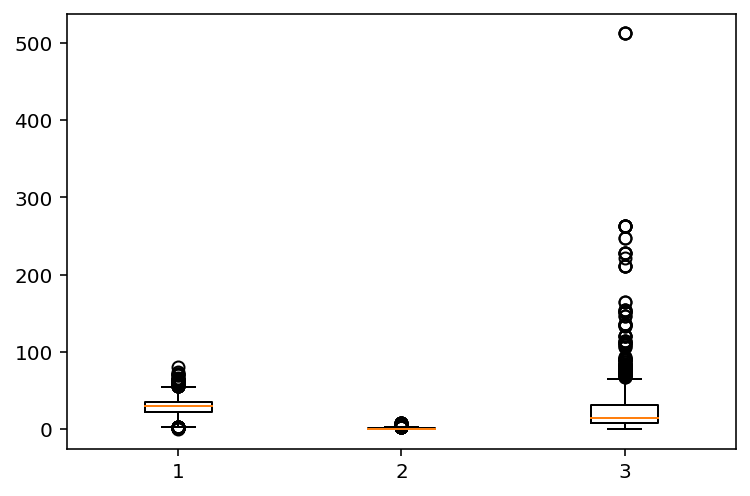

In [122]:
# Boxplot으로 확인
plt.boxplot([x['Age'], x['SibSp'], x['Fare']])
plt.show()

- 정규화를 진행합니다.
- 참고) sklearn 라이브러리에서 정규화 모듈을 제공하지만, 직접 계산함이 더 편리합니다.

$$\large x_{new}=\frac{x-x_{min}}{x_{max}-x_{min}}$$

In [ ]:
# 정규화 (모두 0~1 사이 값으로 변경)
x = 

- 결과를 확인합니다.

In [ ]:
# 확인
x.head()

In [ ]:
# Boxplot으로 확인
plt.boxplot([x['Age'], x['SibSp'], x['Fare']])
plt.show()

# 7. 기타

**1) 딕셔너리 활용**

In [1]:
mydic = {'response': {'body': {'items': {'item': [{'name': 'hong', 'age':20}, {'name': 'jiemae', 'age':25}]}}}}
mydic

{'response': {'body': {'items': {'item': [{'name': 'hong', 'age': 20},
     {'name': 'jiemae', 'age': 25}]}}}}

In [7]:
# 데이터 조회
mydata = mydic['response']['body']['items']['item']

# 확인 
mydata

[{'name': 'hong', 'age': 20}, {'name': 'jiemae', 'age': 25}]

In [14]:
# 라이브러리 불러오기 
import pandas as pd

df = pd.DataFrame(mydata)
df.head()

,name,age
0,hong,20
1,jiemae,25


**2) 결측치 채우기**

In [15]:
# 데이터 읽어오기
path = 'https://bit.ly/AirQFile'
air = pd.read_csv(path)

# 일부 데이터 삭제 index 0~4 삭제
air.drop([0, 1, 2, 3], axis =0, inplace =True)
# 확인
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
4,NaN,NaN,14.3,56,5,5
5,28.0,NaN,14.9,66,5,6
6,23.0,299.0,8.6,65,5,7
7,19.0,99.0,13.8,59,5,8
8,8.0,19.0,20.1,61,5,9


In [16]:
# 원본 복사
air_bk = air.copy()

In [17]:
# 결측치 채우기
air['Ozone'].fillna(method ='ffill', inplace =True) # 앞에 값이 없어서 채우지 못함
air['Solar.R'].fillna(method ='bfill', inplace =True) # 뒤의 값으로 채워짐

# 확인
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
4,NaN,299.0,14.3,56,5,5
5,28.0,299.0,14.9,66,5,6
6,23.0,299.0,8.6,65,5,7
7,19.0,99.0,13.8,59,5,8
8,8.0,19.0,20.1,61,5,9


In [20]:
# 데이터 원상 복구
air = air_bk.copy()
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
4,NaN,NaN,14.3,56,5,5
5,28.0,NaN,14.9,66,5,6
6,23.0,299.0,8.6,65,5,7
7,19.0,99.0,13.8,59,5,8
8,8.0,19.0,20.1,61,5,9


In [21]:
# 결측치 채우기
air['Ozone'].interpolate(method ='linear', inplace =True) # 선형보간으로는 채울수없음
air['Solar.R'].interpolate(method ='linear', inplace =True) # 선형보간으로는 채울수없음
# 확인
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
4,NaN,NaN,14.3,56,5,5
5,28.0,NaN,14.9,66,5,6
6,23.0,299.0,8.6,65,5,7
7,19.0,99.0,13.8,59,5,8
8,8.0,19.0,20.1,61,5,9
